In [528]:
import numpy as np
from shpm2 import SHPM
from evo import evo_alg
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

In [529]:
n = 10
m = 5 # parents
l = 100 # population size
max_iters = 500

In [530]:
shpm = SHPM(n)

In [531]:
# generate a random target matrix 
P_target = shpm.random_point()
A_target = shpm.assemble(P_target)
H_target = shpm.hberg.assemble(P_target[1])

In [532]:
def objective(p):
    A = shpm.assemble(p)    
    distance = np.linalg.norm(A - A_target)
    return distance

In [533]:
# create initial population:
p = [shpm.random_point() for i in range(l)]

In [534]:
# run the evolutionary algorithm:
best, best_fitness, iters_taken, population_objectives = evo_alg(
    p, m, l, objective, shpm.mutate, shpm.crossover, s=0.2, maxiter=max_iters
)

In [535]:
bests = [l[0] for l in population_objectives]

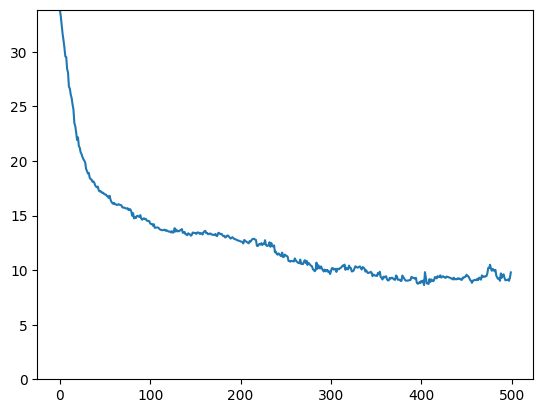

In [536]:
plt.plot(bests)
plt.ylim((0.0, np.max(bests)))
plt.show()

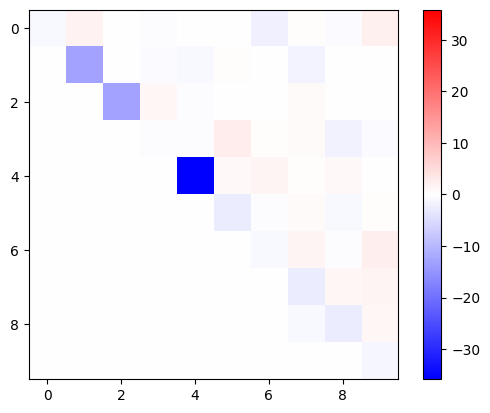

In [ ]:
plt.imshow(H_target, cmap="bwr", norm=CenteredNorm())
plt.colorbar()x

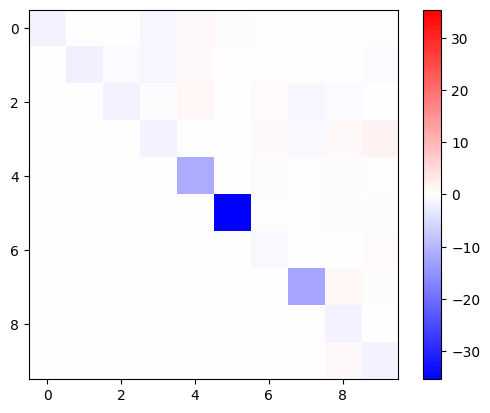

In [539]:
plt.imshow(shpm.hberg.assemble(best[1]), cmap="bwr", norm=CenteredNorm())
plt.colorbar()

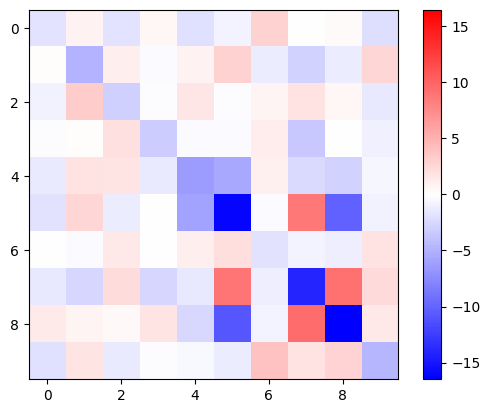

In [540]:
plt.imshow(A_target, cmap="bwr", norm=CenteredNorm())
plt.colorbar()

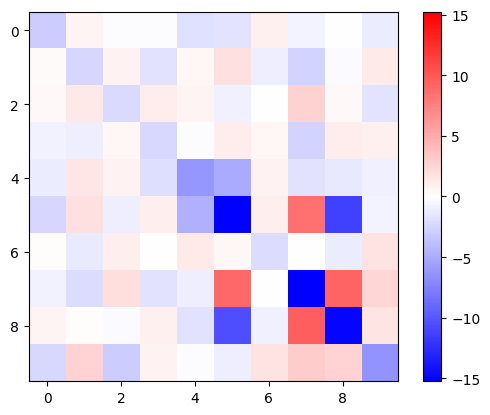

In [541]:
plt.imshow(shpm.assemble(best), cmap="bwr", norm=CenteredNorm())
plt.colorbar()

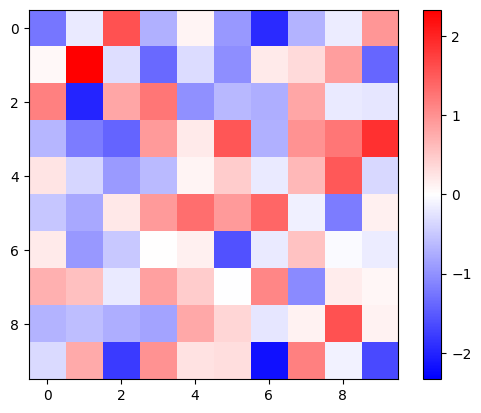

In [542]:
plt.imshow(shpm.assemble(best) - A_target, cmap="bwr", norm=CenteredNorm())
plt.colorbar()